In [1]:
using DelimitedFiles
using Formatting: printfmt
using Plots
using ScHoLP
using Statistics

# Load true output and estimated output.

In [21]:
dataset_name = "email-Eu"
uniform = false 

true_filename = "../output/geom_mean_exact_$dataset_name.txt"
if uniform
    estimated_filename = "../output/geom_mean_sampling_uniform_$dataset_name.txt"
else
    estimated_filename = "../output/geom_mean_sampling_$dataset_name.txt"
end

true_file = open(true_filename, "r")
estimated_file = open(estimated_filename, "r")

true_output = readlines(true_file)
estimated_output = readlines(estimated_file)

close(true_file)
close(estimated_file)

l = size(true_output)[1]
true_triangles, true_time = true_output[1:l-1], true_output[l]
T = Tuple{Float64,Tuple{Int64,Int64,Int64}}
tmp = Array{T,1}(undef, l-1)
for (i, triangle) in enumerate(true_triangles)
    w, t = split(triangle, "\t")
    w = parse(Float64, w)
    a, b, c = split(t, ",")
    a = parse(Int64, a[2:end])
    b = parse(Int64, b)
    c = parse(Int64, c[1:end-1])
    tmp[i] = (w, (a,b,c))
end
true_triangles = tmp

l = size(estimated_output)[1]
estimated_triangles, estimated_time = estimated_output[1:l-3], estimated_output[l-2]
T = Tuple{Float64,Tuple{Int64,Int64,Int64}}
tmp = Array{T,1}(undef, l-3)
for (i, triangle) in enumerate(estimated_triangles)
    w, t = split(triangle, "\t")
    w = parse(Float64, w)
    a, b, c = split(t, ",")
    a = parse(Int64, a[2:end])
    b = parse(Int64, b)
    c = parse(Int64, c[1:end-1])
    tmp[i] = (w, (a,b,c))
end
estimated_triangles = tmp
k = split(estimated_output[l-1], " ")[2]
k = parse(Int64, k)
num_samples = split(estimated_output[l], " ")[2]
num_samples = parse(Int64, num_samples)

printfmt("k: {}\n", k)
printfmt("num_samples: {}\n", num_samples)

k: 25
num_samples: 100000


In [22]:
# dataset_name = "email-Enron"
# 
# true_filename = "../output/geom_mean_exact_$dataset_name.txt"
# estimated_filename = "../output/geom_mean_sampling_$dataset_name.txt"
# 
# true_file = open(true_filename, "r")
# estimated_file = open(estimated_filename, "r")
# 
# true_output = readdlm(true_file)
# estimated_output = readdlm(estimated_file)
# 
# close(true_file)
# close(estimated_file)
# 
# l = size(true_output)[1]
# true_triangles, true_time = true_output[1:l-1, :], true_output[l, :][2]
# true_triangles[:, 2] = map(x -> parse(Int64, x[2:length(x)-1]), true_triangles[:, 2])
# true_triangles[:, 3] = map(x -> parse(Int64, x[1:length(x)-1]), true_triangles[:, 3])
# true_triangles[:, 4] = map(x -> parse(Int64, x[1:length(x)-1]), true_triangles[:, 4])
# tmp = []
# for i in range(1, stop=l-1)
#     w, a, b, c = true_triangles[i, :]
#     push!(tmp, (w, (a,b,c)))
# end
# true_triangles = tmp
# 
# l = size(estimated_output)[1]
# estimated_triangles, estimated_time = estimated_output[1:l-2, :], estimated_output[l-1, 2]
# estimated_triangles[:, 2] = map(x -> parse(Int64, x[2:length(x)-1]), estimated_triangles[:, 2])
# estimated_triangles[:, 3] = map(x -> parse(Int64, x[1:length(x)-1]), estimated_triangles[:, 3])
# estimated_triangles[:, 4] = map(x -> parse(Int64, x[1:length(x)-1]), estimated_triangles[:, 4])
# tmp = []
# for i in range(1, stop=l-2)
#     w, a, b, c = estimated_triangles[i, :]
#     push!(tmp, (w, (a,b,c)))
# end
# estimated_triangles = tmp
# k = estimated_output[l, 2]
# 
# printfmt("k: {}\n", k)

# Time.

In [23]:
printfmt("Time taken by exact algorithm: {}\n", true_time)
printfmt("Time taken by sampling algorithm: {}\n", estimated_time)

Time taken by exact algorithm: Time: 26.326191009
Time taken by sampling algorithm: Time: 1.047125948


# Plot distribution of means in the true and estimated outputs.

There are a total of 395205 triangles in this graph.
μ = 6.008197082144413, σ = 3.336354402947648


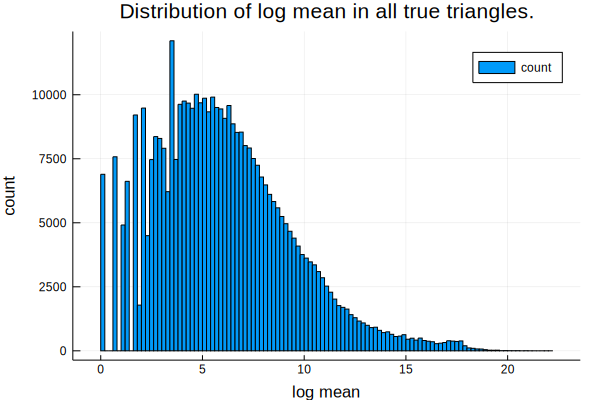

In [24]:
all_true = map(x->log(x[1]), true_triangles[:, 1])
number_triangles = length(all_true)
printfmt("There are a total of {} triangles in this graph.\n", number_triangles)
printfmt("μ = {}, σ = {}\n", mean(all_true), std(all_true))
histogram(all_true, bins=:auto, xlabel="log mean", ylabel="count", label="count",
         title="Distribution of log mean in all true triangles.")

μ = 20.675297522584632, σ = 0.5425875288365055


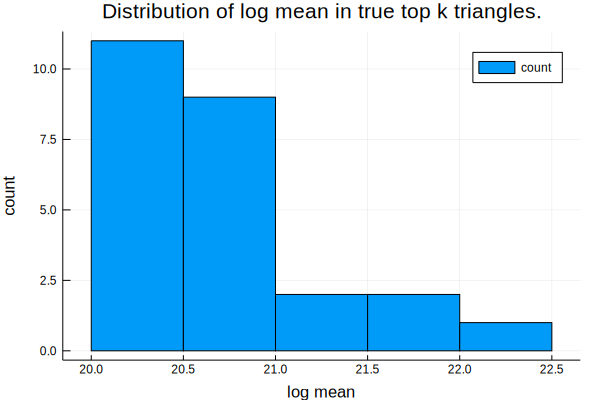

In [25]:
top_k_true = map(x->log(x[1]), true_triangles[1:k, 1])
printfmt("μ = {}, σ = {}\n", mean(top_k_true), std(top_k_true))
histogram(top_k_true, bins=:auto, xlabel="log mean", ylabel="count", label="count",
         title="Distribution of log mean in true top k triangles.")

μ = 20.675297522584632, σ = 0.5425875288365055


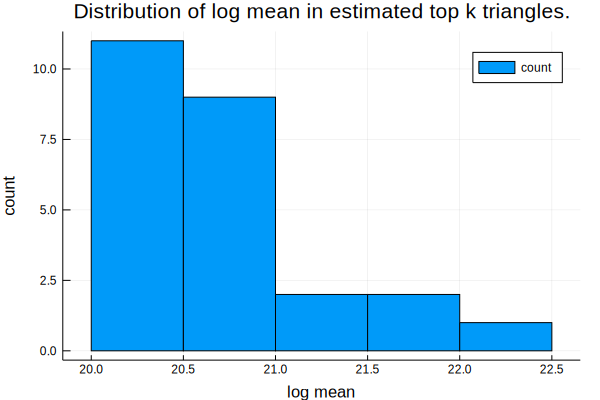

In [26]:
top_k_estimated = map(x->log(x[1]), estimated_triangles[1:k, 1])
printfmt("μ = {}, σ = {}\n", mean(top_k_estimated), std(top_k_estimated))
histogram(top_k_estimated, bins=:auto, xlabel="log mean", ylabel="count", label="count",
          title="Distribution of log mean in estimated top k triangles.")


# What is the distribution of ranks of estimated triangles?

In [27]:
function find_rank(t)
    return searchsorted(true_triangles, t, by=x->x[1], rev=true)[1]
end

estimated_ranks = [find_rank(t) for t in estimated_triangles]
;

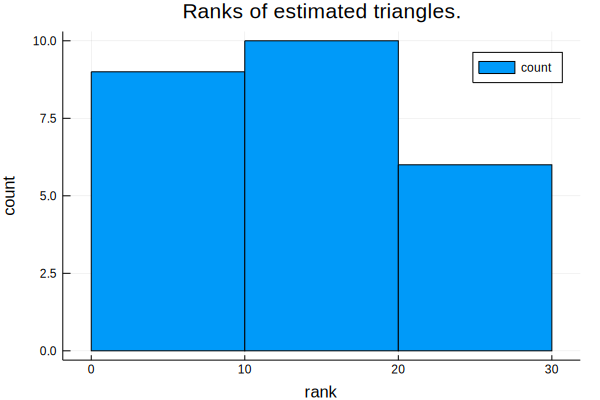

In [28]:
histogram(estimated_ranks, bins=:auto, xlabel="rank", ylabel="count", label="count",
          title="Ranks of estimated triangles.")

# What is the distribution of percentile of the estimated triangles?

In [29]:
estimated_percentiles = [1 - r/number_triangles for r in estimated_ranks]
;

Estimated triangles
Mean percentile: 0.9999671056793309, median percentile: 0.999967105679331


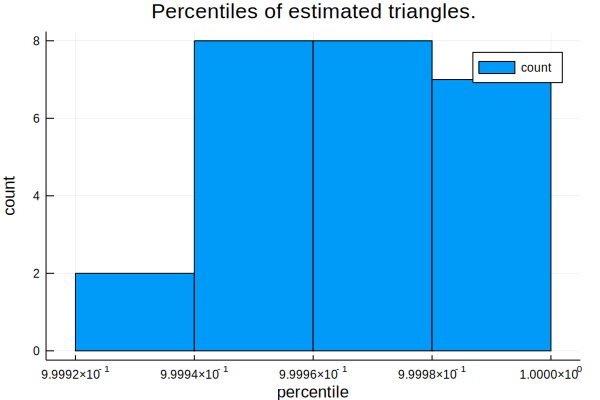

In [30]:
println("Estimated triangles")
printfmt("Mean percentile: {}, median percentile: {}\n",
         mean(estimated_percentiles), median(estimated_percentiles))
histogram(estimated_percentiles, bins=:auto, xlabel="percentile", ylabel="count", label="count",
          title="Percentiles of estimated triangles.")

# How many of the estimated triangles are in the top k?

In [31]:
estimated_accuracy = mean([find_rank(t) <= k for t in estimated_triangles])
printfmt("Estimated accuracy: {}\n", estimated_accuracy)

Estimated accuracy: 1.0
